In [117]:
import pandas as pd
import numpy as np
import fit_and_print as fp
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_curve


import matplotlib.pyplot as plt
import seaborn as sn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [85]:
### Data Exploration
np.random.seed(1)
df = pd.read_csv('nba.games.stats.csv', index_col=0)
df[df['Team']=='ATL'].head(1)

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,...,27,33,0.818,16,48,26,13,9,9,22


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 1 to 82119
Data columns (total 40 columns):
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds                 9840 non-null int64
TotalRebounds    

In [87]:
df.shape

(9840, 40)

In [88]:
df.describe()

,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.00000,...,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,41.500000,103.652337,103.652337,38.602439,84.902439,0.455689,9.126829,25.623679,0.354321,17.32063,...,17.32063,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,23.670804,12.188043,12.188043,5.029992,7.130043,0.054711,3.598084,7.102501,0.097782,6.00262,...,6.00262,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,1.000000,64.000000,64.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,1.00000,...,1.00000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,21.000000,95.000000,95.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.290000,13.00000,...,13.00000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,41.500000,103.000000,103.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,17.00000,...,17.00000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,62.000000,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,21.00000,...,21.00000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,82.000000,149.000000,149.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,44.00000,...,44.00000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [89]:
df[['FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.']].head()

,FieldGoals,FieldGoalsAttempted,FieldGoals.
1,40,80,0.500
2,35,69,0.507
3,38,92,0.413
4,43,93,0.462
5,33,81,0.407


In [90]:
df.columns

Index(['Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints',
       'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.',
       'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows',
       'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls',
       'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.',
       'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.',
       'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.',
       'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals',
       'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls'],
      dtype='object')

In [91]:
#dfpd.get_dummies(df['Home']).head()

In [92]:
X = df.drop(['Team', 'Game', 'Date', 'Opponent', 'WINorLOSS', 'TeamPoints', 'OpponentPoints'], axis=1)
y = df['WINorLOSS']
X = pd.get_dummies(X)
y.head()
X.head(1)

,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,...,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,Home_Away,Home_Home
1,40,80,0.5,13,22,0.591,9,17,0.529,10,...,0.818,16,48,26,13,9,9,22,1,0


In [93]:
X_train_kf, X_test_final, y_train_kf, y_test_final = train_test_split(X,y,test_size=.2, random_state = 1)
kfold = KFold(n_splits = 10)
dt = DecisionTreeClassifier(criterion = 'entropy')


In [94]:
fp.fit_model_and_print_metrics(kfold.split(X_train_kf, y_train_kf), X_train_kf, y_train_kf, dt)

{'accuracy': 0.8102132366694832,
 'precision': 0.8093914341615829,
 'recall': 0.813866670159072,
 'f1': 0.8114383390445148,
 'roc_auc': 0.8102310619001993}

In [95]:
np.random.seed(1)
dt = DecisionTreeClassifier(max_depth = 4)
fp.fit_model_and_print_metrics(kfold.split(X_train_kf, y_train_kf), X_train_kf, y_train_kf, dt)

{'accuracy': 0.7825208495926832,
 'precision': 0.7706382648774228,
 'recall': 0.8085526377492822,
 'f1': 0.7883549077650438,
 'roc_auc': 0.8639404784429583}

In [136]:
parameters = {'criterion':["gini", "entropy"]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters, cv=10, scoring='roc_auc')
clf.fit(X_train_kf, y_train_kf)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [131]:
clf.best_score_

0.8107050513657125

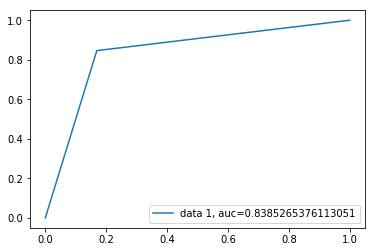

In [137]:
y_pred_proba = clf.predict_proba(X_test_final)[:,1]
fpr, tpr, _ = roc_curve(y_test_final,  y_pred_proba, pos_label="W")
auc = roc_auc_score(y_test_final, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [98]:
prediction = clf.best_estimator_.predict_proba(X_test_final)[:,1]
roc_auc_score(y_test_final,prediction)

0.8288918042270108

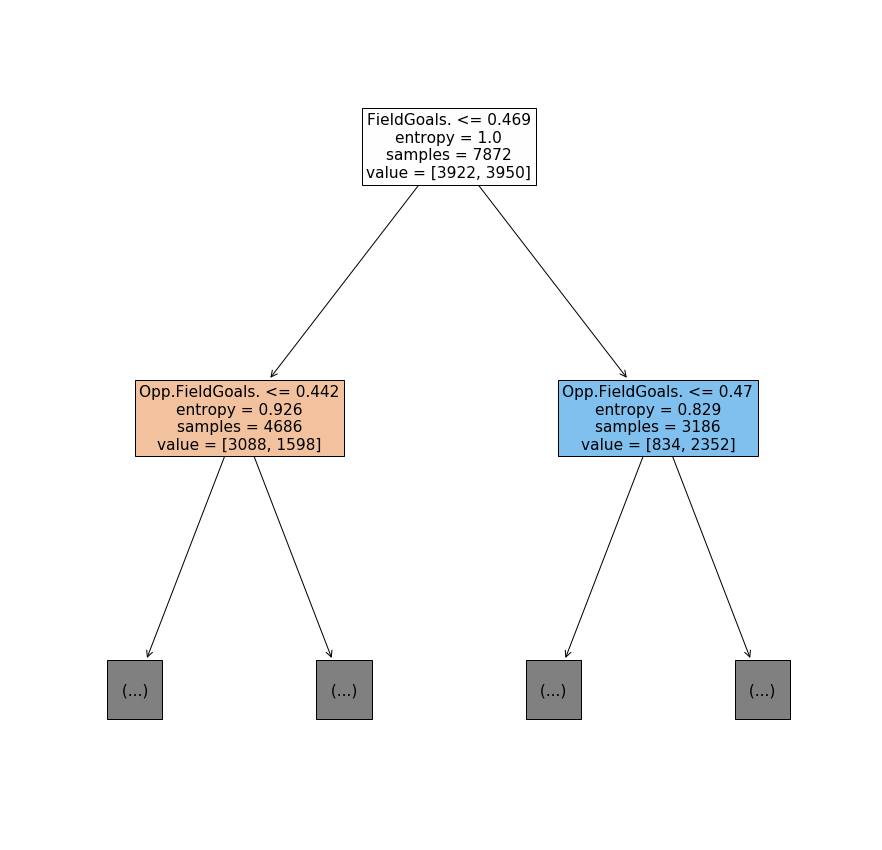

In [104]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf.best_estimator_, filled=True, rotate=True, feature_names=X_test_final.columns, max_depth=1)
plt.savefig("Tree_Example")
plt.show()

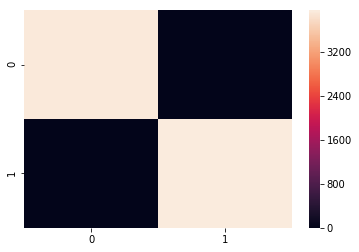

In [68]:
predict = clf.predict(X_train_kf)
toplot = confusion_matrix(predict, y_train_kf)
sn.heatmap(toplot)

In [133]:

parameters = {'max_depth':list(range(1,10)), 'criterion':["gini", "entropy"]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters, cv=10, scoring='roc_auc')
clf.fit(X_train_kf, y_train_kf)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
        

In [70]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
clf.best_score_

0.8772013946818292

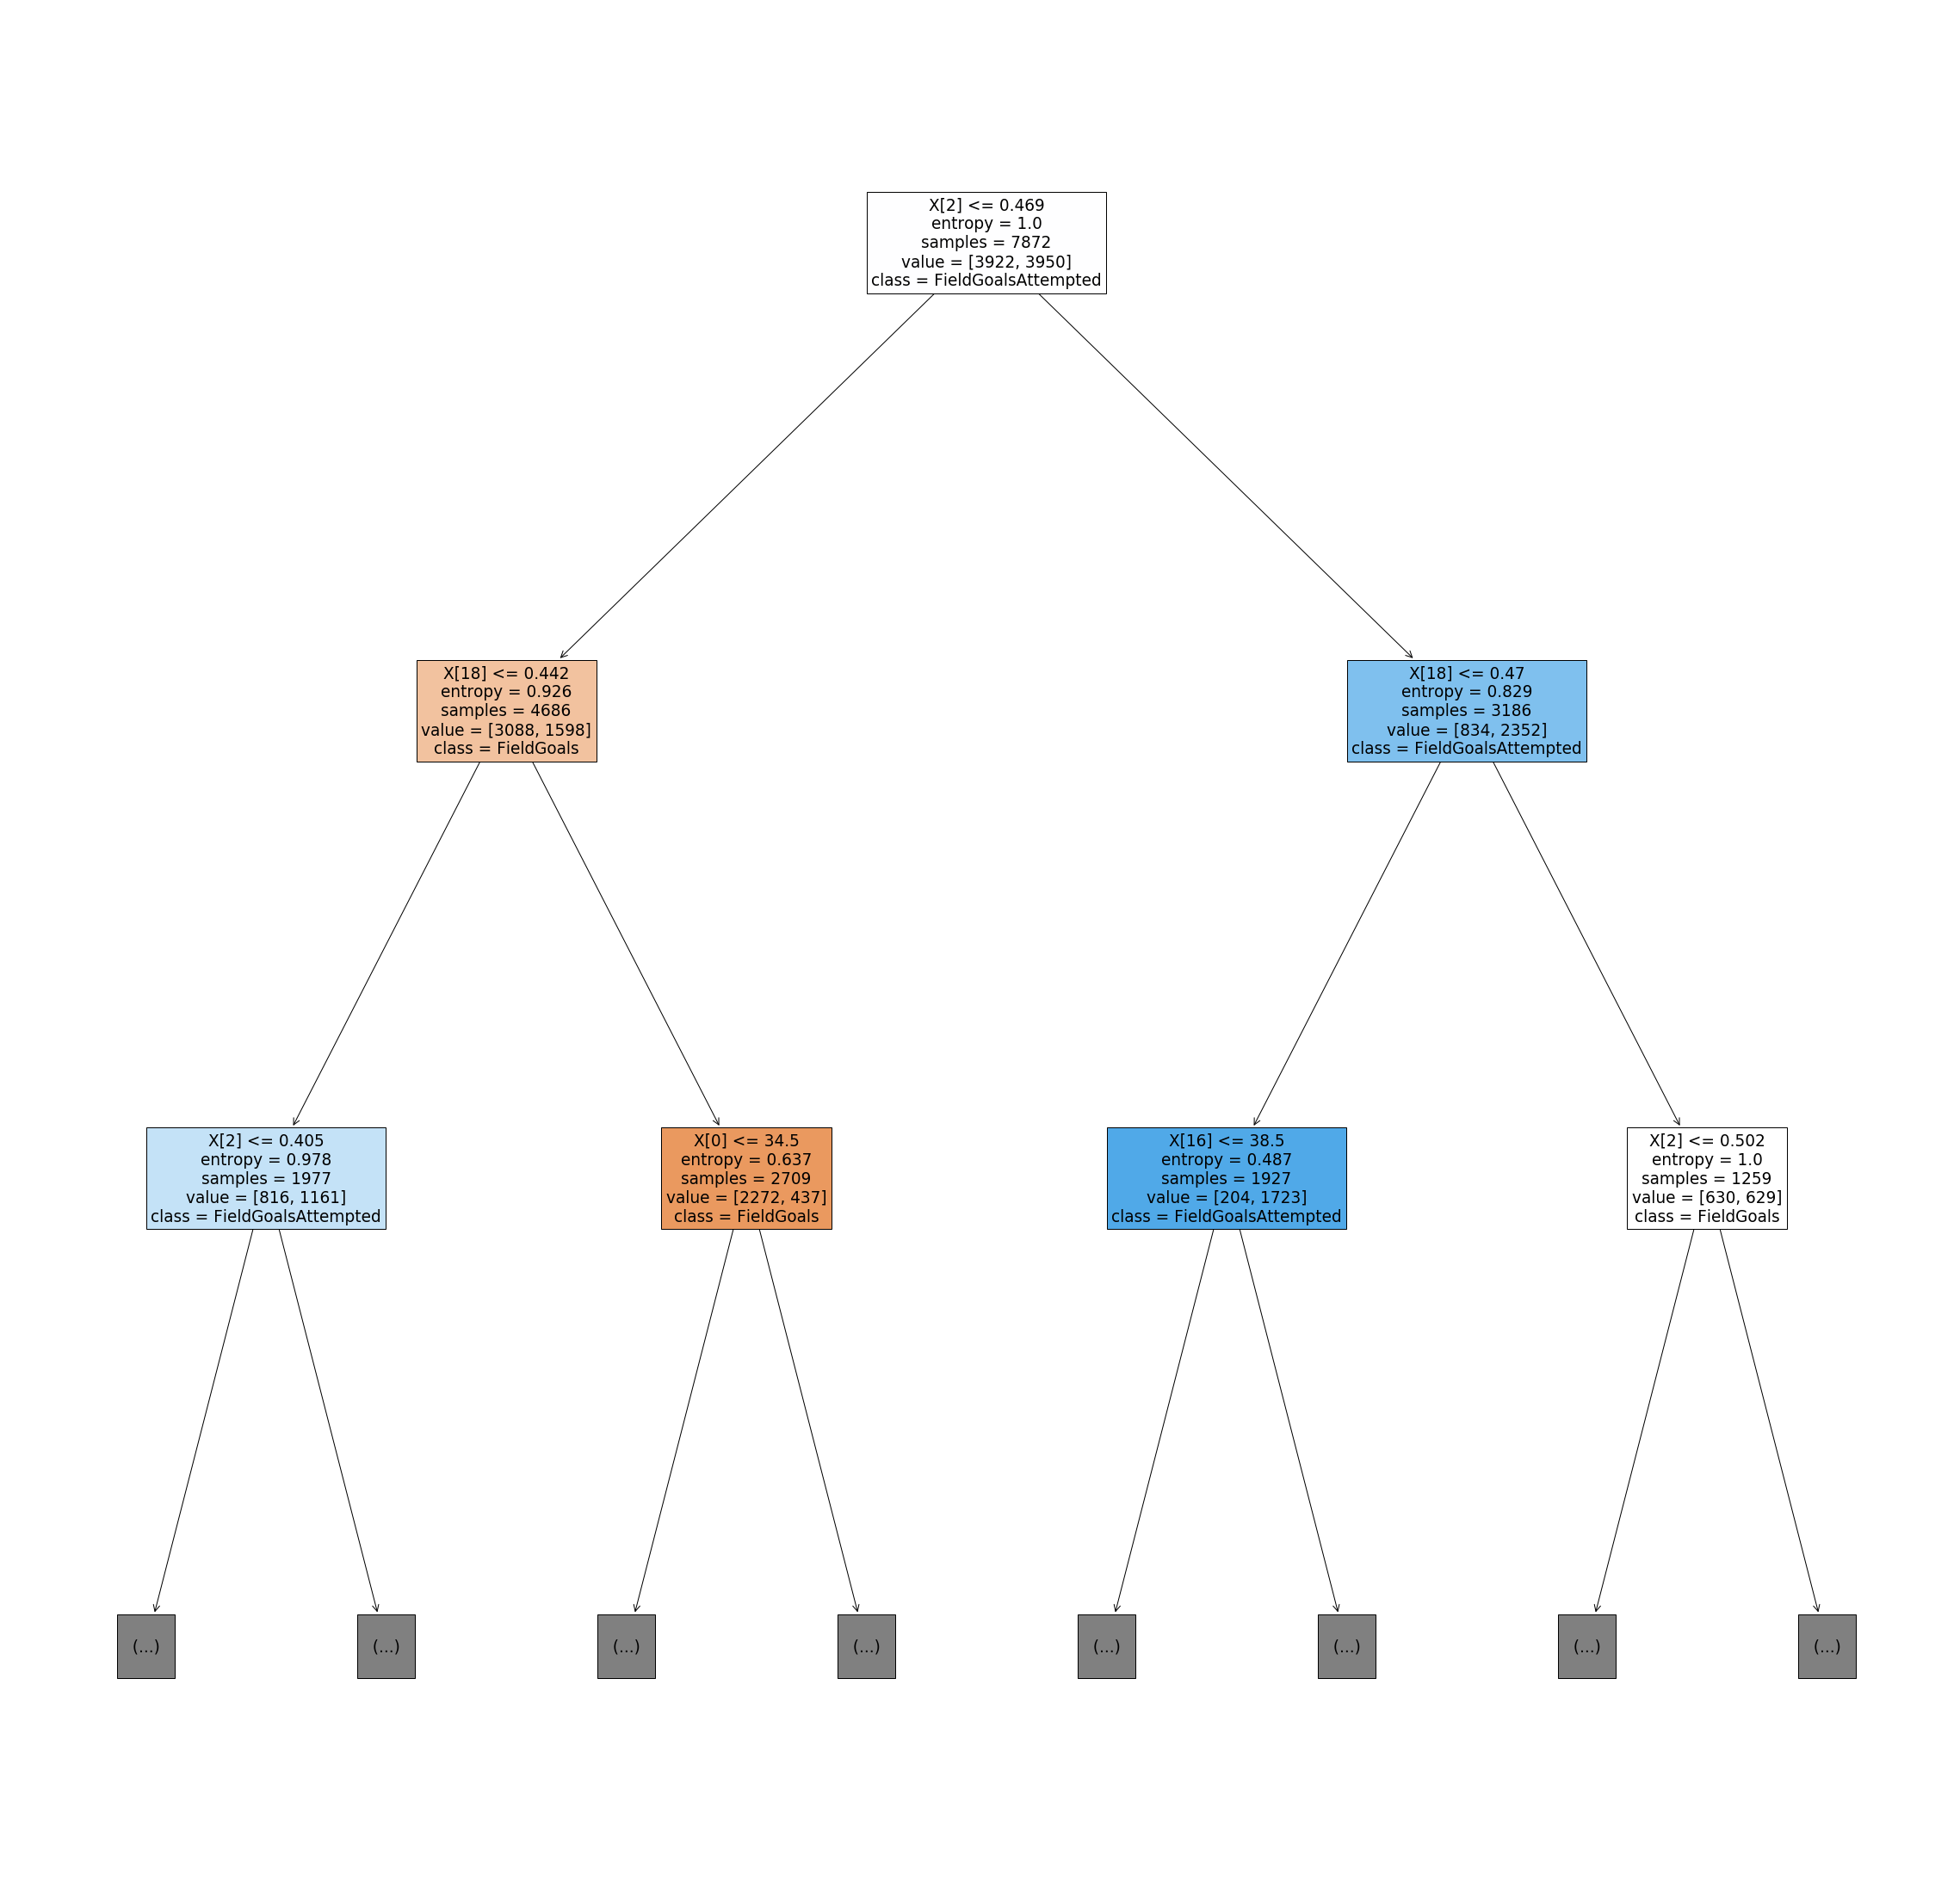

In [72]:
plt.figure(figsize=(40,40))
tree.plot_tree(clf.best_estimator_, class_names=X_test_final.columns, filled=True, rotate=True, max_depth=2)
plt.show()

In [73]:
clf.cv_results_

{'mean_fit_time': array([0.02634792, 0.02398016, 0.04450641, 0.04489954, 0.04351125,
        0.05617726, 0.0634264 , 0.08081717, 0.08572426, 0.01921926,
        0.02600369, 0.02916689, 0.04818995, 0.05273108, 0.0511544 ,
        0.06535792, 0.07762794, 0.07833114]),
 'std_fit_time': array([0.0060582 , 0.00311044, 0.01021781, 0.00733789, 0.00751747,
        0.00977001, 0.00897406, 0.00824674, 0.01428081, 0.00092029,
        0.0023532 , 0.00290993, 0.00469919, 0.0076177 , 0.004033  ,
        0.01143898, 0.01153426, 0.01047312]),
 'mean_score_time': array([0.00471716, 0.00325022, 0.00493581, 0.0042691 , 0.00291972,
        0.00354049, 0.00299258, 0.00388353, 0.00350575, 0.00393758,
        0.00363824, 0.00307555, 0.00398443, 0.00335248, 0.0028532 ,
        0.00343659, 0.00330479, 0.00290995]),
 'std_score_time': array([0.00164201, 0.00040844, 0.00199603, 0.00169658, 0.00034028,
        0.00110524, 0.00022726, 0.00063989, 0.00060706, 0.00049128,
        0.00064526, 0.00047328, 0.00064846, 

In [74]:
A =dict(zip(X.columns,clf.best_estimator_.feature_importances_))
A

{'FieldGoals': 0.03169377405276038,
 'FieldGoalsAttempted': 0.0,
 'FieldGoals.': 0.3262259261657919,
 'X3PointShots': 0.0,
 'X3PointShotsAttempted': 0.0,
 'X3PointShots.': 0.01551558316239544,
 'FreeThrows': 0.04206235605002209,
 'FreeThrowsAttempted': 0.007921502406507368,
 'FreeThrows.': 0.0,
 'OffRebounds': 0.0020351651063812127,
 'TotalRebounds': 0.0,
 'Assists': 0.009413734315823262,
 'Steals': 0.006012547685124991,
 'Blocks': 0.0,
 'Turnovers': 0.012350051437838214,
 'TotalFouls': 0.0,
 'Opp.FieldGoals': 0.03977416719616066,
 'Opp.FieldGoalsAttempted': 0.0,
 'Opp.FieldGoals.': 0.39526862147286934,
 'Opp.3PointShots': 0.004311327001108564,
 'Opp.3PointShotsAttempted': 0.0026841661305032102,
 'Opp.3PointShots.': 0.007593763703162737,
 'Opp.FreeThrows': 0.0252957162690562,
 'Opp.FreeThrowsAttempted': 0.02215565576859124,
 'Opp.FreeThrows.': 0.0,
 'Opp.OffRebounds': 0.0,
 'Opp.TotalRebounds': 0.02276925718104239,
 'Opp.Assists': 0.0,
 'Opp.Steals': 0.009365321924593365,
 'Opp.Blocks'

In [75]:
sorted(clf.best_estimator_.feature_importances_)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0020351651063812127,
 0.0026841661305032102,
 0.004311327001108564,
 0.006012547685124991,
 0.007593763703162737,
 0.007831040471545878,
 0.007921502406507368,
 0.009365321924593365,
 0.009413734315823262,
 0.009720322498721522,
 0.012350051437838214,
 0.01551558316239544,
 0.02215565576859124,
 0.02276925718104239,
 0.0252957162690562,
 0.03169377405276038,
 0.03977416719616066,
 0.04206235605002209,
 0.3262259261657919,
 0.39526862147286934]

In [134]:
parameters = {'max_depth':list(range(1,10)), 'criterion':["gini", "entropy"]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=10, scoring='roc_auc')
clf.fit(X_train_kf, y_train_kf)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/l

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/l

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/l

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/l

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/l

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/envs/learn-env/l

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

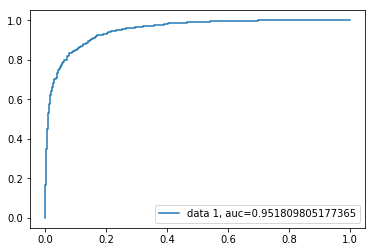

In [135]:
y_pred_proba = clf.predict_proba(X_test_final)[:,1]
fpr, tpr, _ = roc_curve(y_test_final,  y_pred_proba, pos_label="W")
auc = roc_auc_score(y_test_final, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [77]:
clf.best_score_

0.9513362339608603

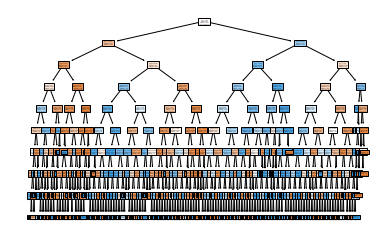

In [78]:
tree.plot_tree(clf.best_estimator_.estimators_[0], filled=True, rotate=True)

# fig = plt.gcf()
#fig.set_size_inches(150, 100)
plt.show()

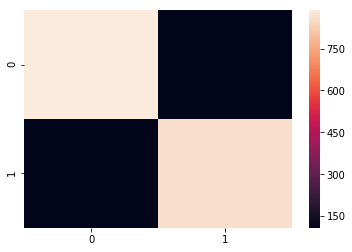

In [79]:
predict = clf.predict(X_test_final)
toplot = confusion_matrix(predict, y_test_final)
sn.heatmap(toplot)

In [80]:
prediction = clf.best_estimator_.predict_proba(X_test_final)[:,1]
prediction
roc_auc_score(y_test_final,prediction)

0.9566659091378634

In [81]:
importance = []
for imp, feat in zip(clf.best_estimator_.feature_importances_, X_test_final.columns):
    importance.append((imp, feat))
sorted(importance)

[(0.001509027237089313, 'Home_Away'),
 (0.005757311107189727, 'Home_Home'),
 (0.006203790764353811, 'Opp.Blocks'),
 (0.006453063471709008, 'Opp.OffRebounds'),
 (0.007247450300754211, 'OffRebounds'),
 (0.007250014655603164, 'Opp.3PointShotsAttempted'),
 (0.0077350360071924374, 'FieldGoalsAttempted'),
 (0.007738430862030602, 'Blocks'),
 (0.007953592556078658, 'Opp.FieldGoalsAttempted'),
 (0.008772842562301954, 'FreeThrows.'),
 (0.011598844398497052, 'X3PointShotsAttempted'),
 (0.012062121857524302, 'Steals'),
 (0.012323990943328676, 'Opp.FreeThrows.'),
 (0.012620322408855258, 'Opp.Steals'),
 (0.014040461860220071, 'TotalFouls'),
 (0.015400973863091263, 'Opp.TotalFouls'),
 (0.015637777346997592, 'Turnovers'),
 (0.01862132562235034, 'Opp.Turnovers'),
 (0.019199523576984113, 'X3PointShots'),
 (0.02094893114153264, 'FreeThrowsAttempted'),
 (0.024822260839596072, 'Opp.3PointShots'),
 (0.025001226049617808, 'FreeThrows'),
 (0.026722097118784226, 'Opp.FreeThrowsAttempted'),
 (0.0270077025466025